In [472]:
!pip install tqdm

  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)


In [474]:
with zipfile.ZipFile('spd_postcodeindex_cut_22_1_csv.zip','r') as fid:
    fid.extractall('post_codes.csv')


https://scotlis.ros.gov.uk/results?searchType=prices&postcode=G42+8LE&sortBy=address&sortDir=asc


In [507]:
%%writefile prices.py
import numpy as np
import pandas as pd
import requests 
import json
import webbrowser
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import zipfile
import copy
import json
import time
from tqdm import tqdm

def get_prices(po=None):
    url = 'https://scotlis.ros.gov.uk/results?searchType=prices&postcode='
    url += f'{po[0]}+{po[1]}&sortBy=address&sortDir=asc'
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4)'
    user_agent += ' AppleWebKit/600.7.12 (KHTML, like Gecko) Version/8.0.7 Safari/600.7.12'
    headers = {'User-Agent': user_agent} 
    try:
        req = requests.get(url,headers=headers,timeout=20).text
    except:
        print(f'{po} timed_out')
        return {'dates': None }
    soup = BeautifulSoup(req, 'html.parser')
    dates = [table.text for table in soup.find_all('td',headers='date')]
    address = [table.text for table in soup.find_all('td',headers='address')]
    prices = [table.text.strip('£').replace(',','') for table in soup.find_all('td',headers='price')]
    prices = [0 if not p.isnumeric() else int(p) for p in prices]
    return  {'dates':dates,'address':address,'prices':prices,'url':url}
def get_post_codes():
    df_pc = pd.read_csv('post_codes.csv/LargeUser.csv',low_memory=False)
    post_codes = list(set(df_pc['Postcode'].values))
    post_codes.sort()
    return [code.split(' ') for code in post_codes]

po_codes = get_post_codes()
rands = iter(np.random.uniform(0.01,0.1,len(po_codes)))
all_prices = { }
for code in tqdm(po_codes):
    time.sleep(next(rands))
    data = get_prices(code)
    key = f'{code[0]} {code[1]}'
    if data['dates']:
        all_prices[key]=data
        with open('scotland_house_prices_0.json','w') as handl:
            json.dump(all_prices,handl)

Overwriting prices.py


In [501]:
user_agents


'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4) AppleWebKit/600.7.12 (KHTML, like Gecko) Version/8.0.7 Safari/600.7.12'

 11%|████                                | 1422/12661 [55:19<7:17:18,  2.33s/it]


KeyboardInterrupt: 

In [416]:
get_prices(next(po_codes))

https://scotlis.ros.gov.uk/results?searchType=prices&postcode=G67+3BG&sortBy=address&sortDir=asc


{'G67 3BG': {'dates': ['16-11-2004',
   '05-03-2004',
   '25-02-2005',
   '02-08-2019',
   '25-02-2022',
   '02-10-2015',
   '15-05-2006',
   '29-08-2008',
   '30-03-2016',
   '08-05-2014',
   '21-05-2010',
   '01-09-2017',
   '24-08-2018',
   '30-06-2003',
   '28-02-2020',
   '01-12-2017',
   '11-09-2009',
   '27-04-2018',
   '16-12-2005',
   '03-10-2003',
   '06-11-2020',
   '30-09-2005',
   '20-11-2003',
   '12-04-2013',
   '07-08-2015',
   '19-03-2019',
   '10-04-2012',
   '12-08-2016',
   '24-09-2004',
   '11-07-2016',
   '30-03-2007',
   '26-09-2019',
   '16-09-2016',
   '31-07-2015',
   '26-10-2007',
   '02-08-2007',
   '27-05-2004',
   '18-03-2016',
   '29-08-2014',
   '30-08-2019',
   '22-09-2006',
   '12-01-2021',
   '25-03-2013',
   '27-04-2018',
   '26-03-2021',
   '02-11-2005',
   '08-06-2018',
   '13-03-2015',
   '11-12-2003',
   '11-12-2003',
   '09-11-2007',
   '22-01-2021',
   '01-11-2021',
   '07-03-2019',
   '30-01-2017',
   '13-02-2004',
   '01-08-2014',
   '06-11-2

In [242]:
data_b = copy.deepcopy(data)
data_b['G41 8LE']=data_b['G42 8LE']
data = {**data,**data_b}


In [232]:
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |  

In [166]:

df = pd.DataFrame.from_dict(house_price_data)


In [167]:
df['prices']=df['prices'].values.astype(int)
dts = df['dates']

In [168]:
df['dates']=pd.to_datetime(dts,infer_datetime_format=True)

<AxesSubplot:xlabel='dates'>

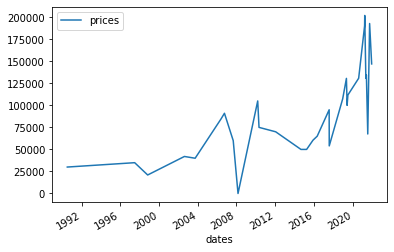

In [169]:
df.plot(x='dates',y='prices')